<a href="https://colab.research.google.com/github/ghdakrk/sound/blob/main/1_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

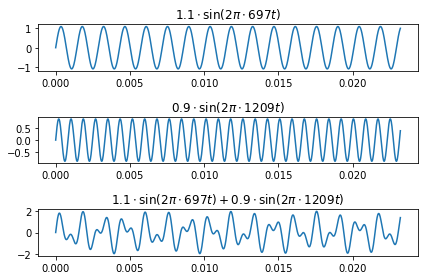

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2
plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

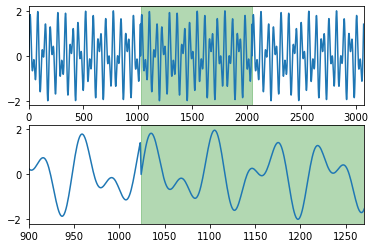

In [3]:
# 깁스현상 / 주파수가 끊기는 현상

y2 = np.hstack([y, y, y])
plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)
plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


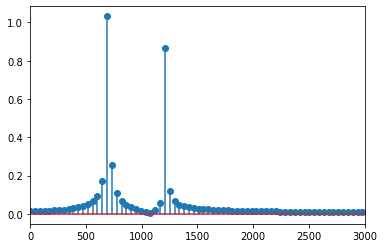

In [4]:
# 푸리에 변환

from scipy.fftpack import fft
yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this w

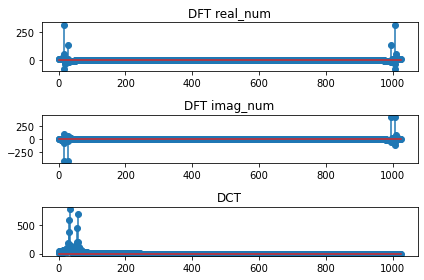

In [6]:
from scipy.fftpack import dct
dct_type = 2
yf2 = dct(y, dct_type, N)
plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT real_num")
plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT imag_num")
plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")
plt.tight_layout()
plt.show()

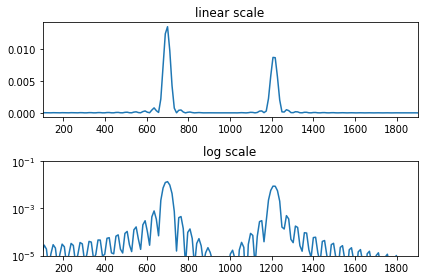

In [8]:
# spectrum
import scipy as sp
import scipy.signal
f, P = sp.signal.periodogram(y, 44100, nfft=2**12)
plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("linear scale")
plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("log scale")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1024
  n_fft, y.shape[-1]


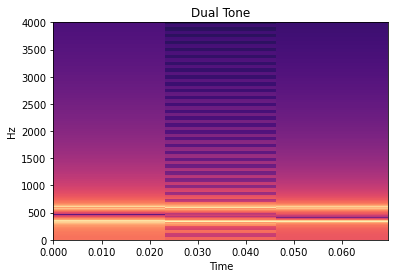

In [9]:
import librosa
import librosa.display
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()